# Importing important library

In [ ]:
pip install transformers

     |████████████████████████████████| 2.3MB 7.9MB/s 
     |████████████████████████████████| 3.3MB 36.5MB/s 
     |████████████████████████████████| 901kB 45.2MB/s 


In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.model_selection import StratifiedKFold , train_test_split
import transformers 
import tokenizers
print('TF version',tf.__version__)

TF version 2.4.1


# Upload dataset

In [ ]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print("your uploaded file {name} with length of file{len}".format(name=fn,len=len(uploaded[fn])))

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv
your uploaded file test.csv with length of file313984
your uploaded file train.csv with length of file3501243


# Data exploration

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [ ]:

train.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,85cae2efd9,Funeral ceremony...gloomy friday...,good,neutral
freq,1,1,199,11118


In [ ]:
train=train.fillna('')

In [ ]:
train['length'] = train['text'].apply(len)
train.head()

,textID,text,selected_text,sentiment,length
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46
2,088c60f138,my boss is bullying me...,bullying me,negative,25
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75


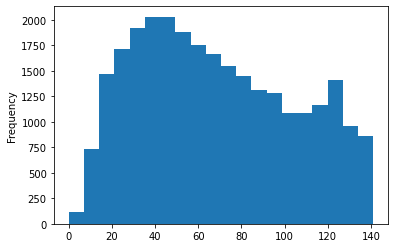

In [ ]:
train['length'].plot(bins=20,kind='hist')

In [ ]:
# roberta tokenizera is preferred
tokenizer = transformers.RobertaTokenizer.from_pretrained('roberta-base')

In [ ]:
def transformed_text(x):
  return tokenizer.encode(" "+" ".join(x.split()))

In [ ]:
train['token_text']=train['text'].apply(transformed_text)

In [ ]:
train['token_text_len']=train['token_text'].apply(len)

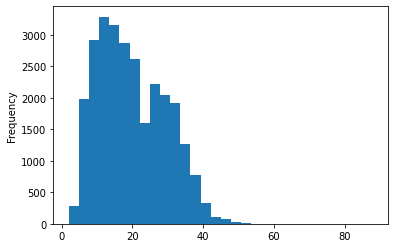

In [ ]:
train['token_text_len'].plot(bins=30,kind='hist')

In [ ]:
train['token_text_len'].describe()

count    27481.000000
mean        19.878935
std          9.520686
min          2.000000
25%         12.000000
50%         19.000000
75%         27.000000
max         88.000000
Name: token_text_len, dtype: float64

# neutral sentiment analysis

In [ ]:
pd.set_option('max_colwidth', 150)

In [ ]:
train[train['sentiment']=='neutral'][['text','selected_text']].head()

,text,selected_text
0,"I`d have responded, if I were going","I`d have responded, if I were going"
5,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth
7,Soooo high,Soooo high
8,Both of you,Both of you
10,"as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff","as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff"


In [ ]:
# metric
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    if (len(a)==0) & (len(b)==0): return 0.5
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))
def jac_score(x):
  return jaccard(x['text'],x['selected_text'])

In [ ]:
neutral_jac=train[train['sentiment']=='neutral'].apply(jac_score,axis=1)

In [ ]:
sum(neutral_jac==1)/(len(neutral_jac))

0.9005216765605325

In [ ]:
train[train['sentiment']=='neutral'][neutral_jac!=1][['text','selected_text']]

,text,selected_text
35,"Thats it, its the end. Tears for Fears vs Eric Prydz, DJ Hero http://bit.ly/2Hpbg4","Thats it, its the end. Tears for Fears"
57,will be back later. http://plurk.com/p/rp3k7,will be back later.
86,Miles from you I`m in Essex so give me plenty of warning so I can arrive in time to get at least one of those free beers.,Miles from you I`m in Essex so give me plenty of warning so I can arrive in time to get at least one of those free beers
92,Hi how are you doing ??? *just joined twitter...*,Hi how are you doing ??? *just joined twitter...
110,if u have a friendster add me!!!!!!!!! my email adress add me loco_crime_1st.com add me leave some comment,if u have a friendster add me!!!!!!!!! my email adress add me loco_crime_1st.com add me
...,...,...
27315,Poor you If I was with you right now; I would probably give you a hug ;D,Poor you If I was with you right now; I would probably give you a hug
27332,haha i see im so bored rite now.. it seems like everyone is headin to vegas this weekend,haha i see im so bored rite now.
27349,"yea but that`s an old pic, she looks a lot different now...she turned into such a beautiful women I miss her A LOT!","yea but that`s an old pic, she looks a lot different now...she turned into such a beautiful women I miss her A LO"
27374,"says Finally, Im home. http://plurk.com/p/rr121","says Finally, Im home."


In [ ]:
neutral_jac.mean() # neutral sentiment row has selected_text same as text

0.976401816076681

# Dataset labeling issue

In [ ]:
valid=[]
invalid=[]
for k in range(len(train)):
  tex=tokenizer.encode(" "+" ".join(train.loc[k,'text'].split()))
  sel=tokenizer.encode(" "+" ".join(train.loc[k,'selected_text'].split()))
  b=sel[1:-1]
  a=tex[1:-1]
  t=[x for x in range(len(a)) if a[x:x+len(b)] == b]
  if t!=[]:
    valid.append(k);
  else:
    invalid.append(k);

In [ ]:
len(valid)

24891

In [ ]:
train.loc[invalid[:10],['text','selected_text']]

,text,selected_text
18,is back home now gonna miss every one,onna
27,On the way to Malaysia...no internet access to Twit,.no internet
32,If it is any consolation I got my BMI tested hahaha it says I am obesed well so much for being unhappy for about 10 minutes.,well so much for being unhappy for about 10 minute
39,"A little happy for the wine jeje ok it`sm my free time so who cares, jaja i love this day",A little happy fo
48,"i donbt like to peel prawns, i also dont like going shopping, running out of money and crawling round the car looking for more",dont like go
49,which case? I got a new one last week and I`m not thrilled at all with mine.,d I`m not thrilled at all with mine.
64,mannnn..... _ got an iphone!!! im jealous.... http://bit.ly/NgnaR,jealous..
66,He`s awesome... Have you worked with him before? He`s a good friend.,s awesome
84,"Still no reply from about my SimFinger problem So no iRape parody video until I get a response, sorry guys",", sorry guys"
102,"1 week post my'horrible, traumatic jumping cholla accident.'-cholla`s next dirty trick:pieces are starting to emerge from my hand! Ouch!","horrible,"


# try

In [ ]:
try_test=" ".join(" how are you ".split())
try_test

'how are you'

In [ ]:
tokenizer.decode([141])

' how'

In [ ]:
tokenizer.decode([6908])

' gonna'

In [ ]:
tokenizer.encode(try_test) 

[0, 9178, 32, 47, 2]

In [ ]:
tokenizer.encode(" "+try_test)

[0, 141, 32, 47, 2]

In [ ]:
k=3
tex =" "+" ".join(train.loc[k,'text'].split()) # removing spaces 
sel= " ".join(train.loc[k,'selected_text'].split()) # need not be space at first place
print((tex,sel))
print(len(tex),len(sel))
idx = tex.find(sel)
print(idx)
chars = np.zeros((len(tex)))
chars[idx:idx+len(sel)]=1
print(chars)
enc_t = tokenizer.encode(tex)
print(enc_t)
enc_len=0
for t in enc_t:
  print(tokenizer.decode([t]),len(tokenizer.decode([t])))
  enc_len+=len(tokenizer.decode([t]))
print(enc_len)
idx=0
tok_idx=[]
for i in range(1,len(enc_t)-1):
  wid=len(tokenizer.decode([enc_t[i]]))
  if np.sum(chars[idx:idx+wid])>0:
     tok_idx.append(i)
  idx+=wid
print(tok_idx)

(' what interview! leave me alone', 'leave me alone')
31 14
17
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]
[0, 99, 1194, 328, 989, 162, 1937, 2]
<s> 3
 what 5
 interview 10
! 1
 leave 6
 me 3
 alone 6
</s> 4
38
[4, 5, 6]


# Data preparation

In [ ]:
# token of " positive negative neutral"
tokens_pt = tokenizer(" negative positive neutral")
for key, value in tokens_pt.items():
    print("{}:\n\t{}".format(key, value))

input_ids:
	[0, 2430, 1313, 7974, 2]
attention_mask:
	[1, 1, 1, 1, 1]


In [ ]:
sentiment_id = {'positive': 1313, 'negative': 2430, 'neutral': 7974}

In [ ]:
MAX_LEN=91
ct = train.shape[0]

input_ids = np.ones((ct,MAX_LEN),dtype='int32')
attention_mask = np.zeros((ct,MAX_LEN),dtype='int32')
start_tokens = np.zeros((ct,MAX_LEN),dtype='int32') # start of output
end_tokens = np.zeros((ct,MAX_LEN),dtype='int32')  # end of output

for k in range(ct):
  # find overlap
  tex =" "+" ".join(train.loc[k,'text'].split()) # removing spaces 
  sel= " ".join(train.loc[k,'selected_text'].split()) # need not be space at first place
  idx = tex.find(sel)

  # making bolean
  chars = np.zeros((len(tex)))
  chars[idx:idx+len(sel)]=1

  # find position 

  enc_t = tokenizer.encode(tex)
  idx=0
  tok_idx=[]
  for i in range(1,len(enc_t)-1):
    wid=len(tokenizer.decode([enc_t[i]]))
    if np.sum(chars[idx:idx+wid])>0:
      tok_idx.append(i)
    idx+=wid
  input_ids[k,:len(enc_t)+3]=enc_t+[2]+[sentiment_id[train.loc[k,'sentiment']]]+[2]
  attention_mask[k,:len(enc_t)+3]=1
  if tok_idx!=[]:
    start_tokens[k,tok_idx[0]]=1
    end_tokens[k,tok_idx[-1]+1]=1



Alternate data preparation

In [ ]:
#eliminating all invalid label data
input_ids_test = np.ones((ct,MAX_LEN),dtype='int32') # 1 is for padding 
attention_mask_test = np.zeros((ct,MAX_LEN),dtype='int32')
start_tokens_test = np.zeros((ct,MAX_LEN),dtype='int32')
end_tokens_test = np.zeros((ct,MAX_LEN),dtype='int32')
for k in valid:
  tex=tokenizer.encode(" "+" ".join(train.loc[k,'text'].split()))
  sel=tokenizer.encode(" "+" ".join(train.loc[k,'selected_text'].split()))
  b=sel[1:-1]
  a=tex[1:-1]
  t=[x for x in range(len(a)) if a[x:x+len(b)] == b]
  input_ids_test[k,:len(tex)+3]=tex+[2]+[sentiment_id[train.loc[k,'sentiment']]]+[2]
  attention_mask_test[k,:len(tex)+3]=1
  start_tokens_test[k,1+t[0]]=1
  end_tokens_test[k,t[0]+len(b)+1]=1

# Testing data preparation

In [ ]:
ct = test.shape[0]
input_ids_t = np.ones((ct,MAX_LEN),dtype='int32')
attention_mask_t = np.zeros((ct,MAX_LEN),dtype='int32')
for k in range(test.shape[0]):
    # INPUT_IDS
    tex = " "+" ".join(test.loc[k,'text'].split())
    enc_t= tokenizer.encode(tex)                
    input_ids_t[k,:len(enc_t)+3] = enc_t + [2] + [sentiment_id[test.loc[k,'sentiment']]] + [2]
    attention_mask_t[k,:len(enc_t)+3] = 1

# Model Preparation

In [ ]:
def build_model():
    ids = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)
    att = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)
    bert_model = transformers.TFRobertaModel.from_pretrained('roberta-base')
    x = bert_model(ids,attention_mask=att)
    
    x1 = tf.keras.layers.Dropout(0.1)(x[0]) 
    x1 = tf.keras.layers.Conv1D(1,1)(x1)
    x1 = tf.keras.layers.Flatten()(x1)
    x1 = tf.keras.layers.Activation('softmax')(x1)
    
    x2 = tf.keras.layers.Dropout(0.1)(x[0]) 
    x2 = tf.keras.layers.Conv1D(1,1)(x2)
    x2 = tf.keras.layers.Flatten()(x2)
    x2 = tf.keras.layers.Activation('softmax')(x2)

    model = tf.keras.models.Model(inputs=[ids, att], outputs=[x1,x2])
    optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer)

    return model

In [ ]:
# metric
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    if (len(a)==0) & (len(b)==0): return 0.5
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

# Model Training

In [ ]:
jac = []; VER='v0'; DISPLAY=1 # USE display=1 FOR INTERACTIVE
oof_start = np.zeros((input_ids.shape[0],MAX_LEN))
oof_end = np.zeros((input_ids.shape[0],MAX_LEN))
preds_start = np.zeros((input_ids_t.shape[0],MAX_LEN))
preds_end = np.zeros((input_ids_t.shape[0],MAX_LEN))

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
for fold,(idxT,idxV) in enumerate(skf.split(input_ids,train.sentiment.values)):

    print('#'*20)
    print('### FOLD %i'%(fold+1))
    print('#'*20)
    
    K.clear_session()
    model = build_model()
        
    sv = tf.keras.callbacks.ModelCheckpoint(
        '%s-roberta-%i.h5'%(VER,fold), monitor='val_loss', verbose=1, save_best_only=True,
        save_weights_only=True, mode='auto', save_freq='epoch')
        
    model.fit([input_ids[idxT,], attention_mask[idxT,]], [start_tokens[idxT,], end_tokens[idxT,]], 
        epochs=2, batch_size=32, verbose=DISPLAY, callbacks=[sv],
        validation_data=([input_ids[idxV,],attention_mask[idxV,]], 
        [start_tokens[idxV,], end_tokens[idxV,]]))
    
    print('Loading model...')
    model.load_weights('%s-roberta-%i.h5'%(VER,fold))
    
    print('Predicting OOF...')
    oof_start[idxV,],oof_end[idxV,] = model.predict([input_ids[idxV,],attention_mask[idxV,]],verbose=DISPLAY)
    
    print('Predicting Test...')
    preds = model.predict([input_ids_t,attention_mask_t],verbose=DISPLAY)
    preds_start += preds[0]/skf.n_splits
    preds_end += preds[1]/skf.n_splits
    
    # DISPLAY FOLD JACCARD
    all = []
    for k in idxV:
        a = np.argmax(oof_start[k,])
        b = np.argmax(oof_end[k,])
        if a>=b: 
            st = train.loc[k,'text'] 
        else:
            text1 = " "+" ".join(train.loc[k,'text'].split())
            enc = tokenizer.encode(text1)
            st = tokenizer.decode(enc[a:b])
        all.append(jaccard(st,train.loc[k,'selected_text']))
    jac.append(np.mean(all))
    print('>>>> FOLD %i Jaccard ='%(fold+1),np.mean(all))
    print()

####################
### FOLD 1
####################


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/2
688/688 [==============================] - 452s 637ms/step - loss: 2.9981 - activation_loss: 1.3872 - activation_1_loss: 1.6109 - val_loss: 1.7410 - val_activation_loss: 0.8990 - val_activation_1_loss: 0.8420

Epoch 00001: val_loss improved from inf to 1.74101, saving model to v0-roberta-1.h5
Epoch 2/2
688/688 [==============================] - 436s 633ms/step - loss: 1.7021 - activation_loss: 0.8605 - activation_1_loss: 0.8415 - val_loss: 1.7001 - val_activation_loss: 0.8541 - val_activation_1_loss: 0.8460

Epoch 00002: val_loss improved from 1.74101 to 1.70014, saving model to v0-roberta-1.h5
Loading model...
Predicting OOF...
172/172 [==============================] - 34s 186ms/step
Predicting Test...
111/111 [==============================] - 21s 186ms/step
>>>> FOLD 2 Jaccard = 0.6940741609826094

####################
### FOLD 3
####################


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/2
688/688 [==============================] - 452s 635ms/step - loss: 2.8723 - activation_loss: 1.4083 - activation_1_loss: 1.4640 - val_loss: 1.6744 - val_activation_loss: 0.8589 - val_activation_1_loss: 0.8154

Epoch 00001: val_loss improved from inf to 1.67437, saving model to v0-roberta-2.h5
Epoch 2/2
688/688 [==============================] - 435s 632ms/step - loss: 1.7273 - activation_loss: 0.8753 - activation_1_loss: 0.8520 - val_loss: 1.7113 - val_activation_loss: 0.8919 - val_activation_1_loss: 0.8194

Epoch 00002: val_loss did not improve from 1.67437
Loading model...
Predicting OOF...
172/172 [==============================] - 34s 186ms/step
Predicting Test...
111/111 [==============================] - 21s 185ms/step
>>>> FOLD 3 Jaccard = 0.6996163624254944

####################
### FOLD 4
####################


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/2
688/688 [==============================] - 452s 636ms/step - loss: 2.8455 - activation_loss: 1.3883 - activation_1_loss: 1.4572 - val_loss: 1.7076 - val_activation_loss: 0.8649 - val_activation_1_loss: 0.8427

Epoch 00001: val_loss improved from inf to 1.70761, saving model to v0-roberta-3.h5
Epoch 2/2
688/688 [==============================] - 435s 633ms/step - loss: 1.6591 - activation_loss: 0.8458 - activation_1_loss: 0.8133 - val_loss: 1.6524 - val_activation_loss: 0.8411 - val_activation_1_loss: 0.8113

Epoch 00002: val_loss improved from 1.70761 to 1.65239, saving model to v0-roberta-3.h5
Loading model...
Predicting OOF...
172/172 [==============================] - 34s 185ms/step
Predicting Test...
111/111 [==============================] - 21s 185ms/step
>>>> FOLD 4 Jaccard = 0.6992473335637099

####################
### FOLD 5
####################


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/2
688/688 [==============================] - 452s 636ms/step - loss: 2.8700 - activation_loss: 1.4062 - activation_1_loss: 1.4638 - val_loss: 1.7029 - val_activation_loss: 0.8812 - val_activation_1_loss: 0.8218

Epoch 00001: val_loss improved from inf to 1.70293, saving model to v0-roberta-4.h5
Epoch 2/2
688/688 [==============================] - 435s 632ms/step - loss: 1.6707 - activation_loss: 0.8588 - activation_1_loss: 0.8119 - val_loss: 1.6565 - val_activation_loss: 0.8577 - val_activation_1_loss: 0.7988

Epoch 00002: val_loss improved from 1.70293 to 1.65654, saving model to v0-roberta-4.h5
Loading model...
Predicting OOF...
172/172 [==============================] - 35s 186ms/step
Predicting Test...
111/111 [==============================] - 21s 186ms/step
>>>> FOLD 5 Jaccard = 0.6927131910720619



In [ ]:
result = []
for k in range(input_ids_t.shape[0]):
    a = np.argmax(preds_start[k,])
    b = np.argmax(preds_end[k,])
    if a>=b: 
        st = test.loc[k,'text']
    else:
        text1 = " "+" ".join(test.loc[k,'text'].split())
        enc = tokenizer.encode(text1)
        st = tokenizer.decode(enc[a:b])
    result.append(st)

In [ ]:
test['selected_text'] = result
test[['textID','selected_text']].to_csv('submission.csv',index=False)
test.sample(25)

,textID,text,sentiment,selected_text
1869,ed4b3d03eb,I took my antibiotics and I still feel like ****,negative,****
2457,de20a4f9ba,What happened with her??? Why is she being so wierd all of a sudden???,negative,wierd
2014,d64eec0d6c,Yes I think so unless it changed. I sent u a happy mothers day text but u never responded back,negative,u never responded back
2458,ceab14b717,"Heading to the office through a very quiet Stockholm, at least its not sunny",neutral,"Heading to the office through a very quiet Stockholm, at least its not sunny"
689,1620bd719e,All done. No more internship.,neutral,All done. No more internship.
1817,363460c8f4,Just got to the gym but w/no energy,neutral,Just got to the gym but w/no energy
3169,932227184c,"At every gas station, I look for postcards for No luck.",negative,No luck.
371,49e9fe8b96,i want to go to singapore but my mother seems not,neutral,i want to go to singapore but my mother seems not
1488,683149f529,well maybe someone will care,positive,well maybe someone will care
2913,9ddcd3f037,http://twitpic.com/4jco5 - The Result of working the Green/Black fingers...,neutral,The Result of working the Green/Black fingers...
